# Data Wrangling


#### Objectives

- Handle missing values
- Correct data formatting
- Standardize and normalize data

#### Import pandas



In [1]:
import pandas as pd

import matplotlib.pylab as plt

#### Reading the dataset from the URL and adding the related headers 

In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    respone = await pyfetch(url)
    if respone.status == 200:
        with open(filename, "wb") as f:
            f.write(await respone.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [8]:
await download(file_path, "usedcars.csv")
file_name = "usedcars.csv"

NameError: name 'download' is not defined

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv(file_path)  

In [8]:
df.columns = headers


In [9]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Identify and handle missing values

<h4>Convert "?" to NaN</h4>
In the car data set, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [10]:
import numpy as np

In [11]:
df.replace("?",np.nan, inplace = True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [13]:
missing_values = df.isnull()
missing_values

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [14]:
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


### Deal with missing data
<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


### Calculate the mean value for the "normalized-losses" column

In [15]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Replace "NaN" with mean value in "normalized-losses" column


In [16]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace = True)

#### Calculate the mean value for the "bore" column and Replace "NaN" with the mean value in the "bore" column

In [17]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3290500000000014


In [20]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

#### "stroke" column

In [19]:

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)


Average of stroke: 3.258299999999994


#### "horsepower" column

In [22]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.22277227722772


In [23]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### "peak-rpm" column

In [24]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.990099009901


In [25]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [26]:
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:

In [27]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what you have seen previously:

In [28]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, drop all rows that do not have price data:

In [29]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [31]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.</p> 


#### Convert data types to proper format

In [32]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df[["price"]] = df[["price"]].astype("float")

df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [34]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization

<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>
<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg

In [35]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [39]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

In [43]:
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [44]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>

In [46]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [48]:
df['height'] = df['height']/df['height'].max() 

In [53]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


## Binning

<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [54]:
# Convert data to correct format:

df["horsepower"] = df["horsepower"].astype(int, copy = True)

Text(0.5, 1.0, 'horsepower bins')

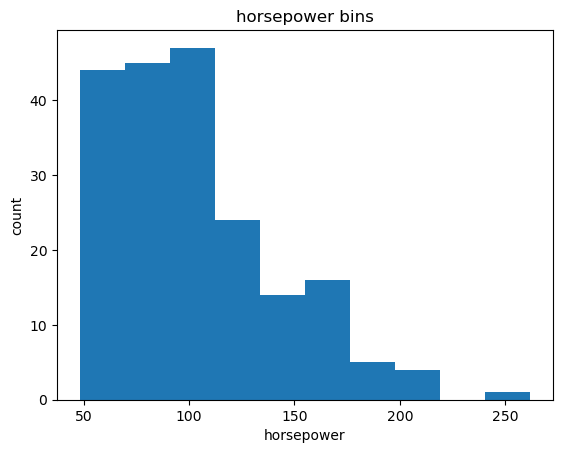

In [57]:
# Plot the histogram of horsepower to see the distribution of horsepower.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>


In [58]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [59]:
# set group names:
group_names = ['Low', 'Medium', 'High']

In [60]:
# Apply the function "cut" to determine what each value of `df['horsepower']` belongs to. 
df["horsepower-binned"] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest = True)

df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [62]:
# See the number of vehicles in each bin:
df['horsepower-binned'].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

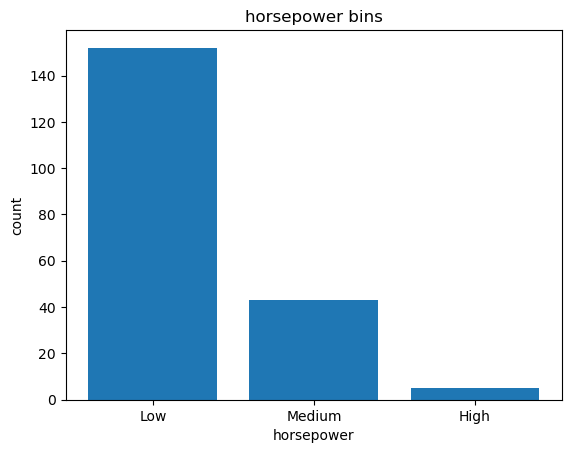

In [63]:
# Plot the distribution of each bin:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# set labels, title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Bins Visualization

Normally, you use a histogram to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

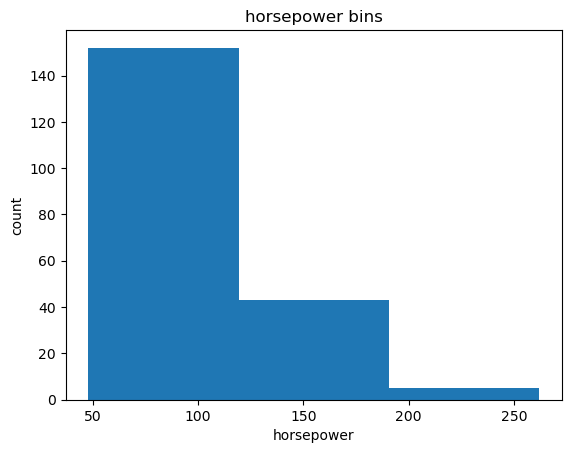

In [64]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [65]:
#Get the indicator variables and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [66]:
# Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.

In [67]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [68]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,9.400000,15250.0,12.368421,Low,0,1


#### column "aspiration"

In [70]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [71]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


In [72]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,9.400000,15250.0,12.368421,Low,0,1,1,0
